In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Single harmonic oscillator

In [2]:
freq = 2.  # Hz
omega = 2. * np.pi * freq

tmax = 10  # s
Nt = 10000
tv = np.linspace(0., tmax, Nt)

def f(X, t):
    x, dotx = X
    ddotx = -omega**2 * x
    return [dotx, ddotx]

In [3]:
%%time
X = odeint(f, [1., 0.], tv)

CPU times: user 6.3 ms, sys: 352 µs, total: 6.65 ms
Wall time: 6.34 ms


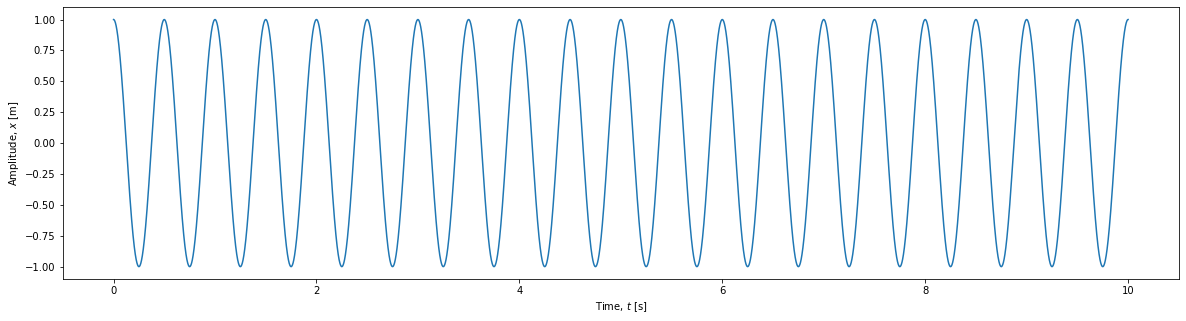

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(tv, X[:, 0], "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Phase model

In [5]:
def fp(p, t):
    dotp = omega * Nt
    return dotp

In [6]:
%%time
Phi = odeint(fp, np.pi/2, tv)

CPU times: user 495 µs, sys: 159 µs, total: 654 µs
Wall time: 505 µs


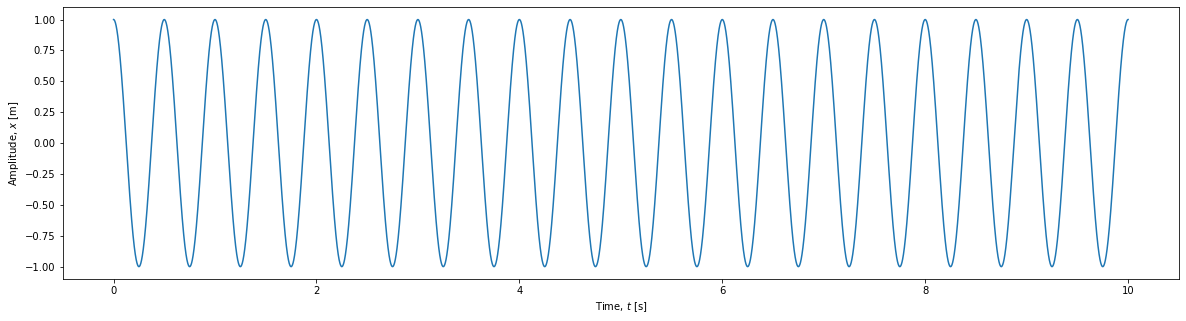

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# Two oscillators

In [8]:
N_osc = 2

Omega = omega + np.random.randn(N_osc) / Nt
Noise = np.ones(N_osc) / Nt
Coupling = 0.5 * np.ones(N_osc)

In [9]:
def fp(p, t):
    C = np.sin(np.array([p[1]-p[0], p[0]-p[1]]))
    dotp = Omega * Nt * np.ones(N_osc) + Noise * np.random.randn(N_osc) + Coupling * C
    return dotp

In [10]:
%%time
Phi = odeint(fp, 2 * np.pi * np.random.rand(N_osc), tv)

CPU times: user 3.64 ms, sys: 1.24 ms, total: 4.88 ms
Wall time: 3.84 ms


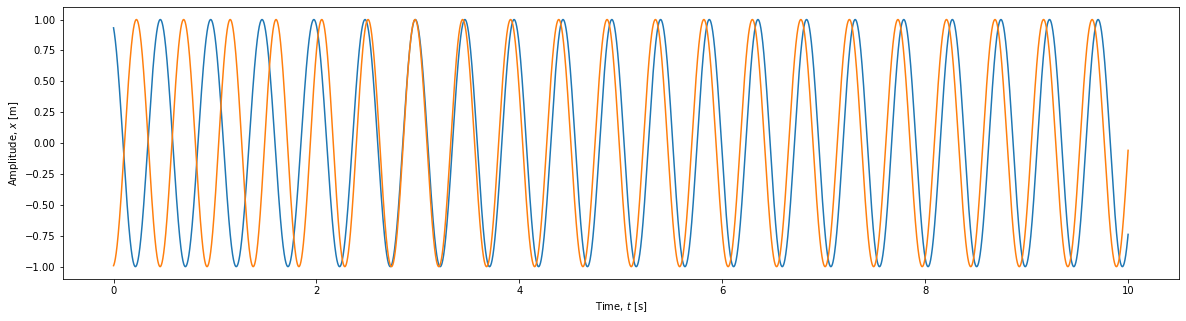

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()

# N oscillators

In [12]:
N_osc = 10

Omega = omega + np.random.randn(N_osc) / Nt
Noise = np.ones(N_osc) * 1 / Nt
Coupling = 0.3 * np.ones(N_osc)

In [13]:
def fp(p, t):
    p = np.atleast_2d(p)
    C = np.sum(np.sin(p).T.dot(np.cos(p)) - np.cos(p).T.dot(np.sin(p)), 0)
    dotp = Omega * Nt * np.ones(N_osc) + Noise * np.random.randn(N_osc) + Coupling * C
    return dotp

In [14]:
%%time
Phi = odeint(fp, 2 * np.pi * np.random.rand(N_osc), tv)

CPU times: user 9.73 ms, sys: 1.09 ms, total: 10.8 ms
Wall time: 10 ms


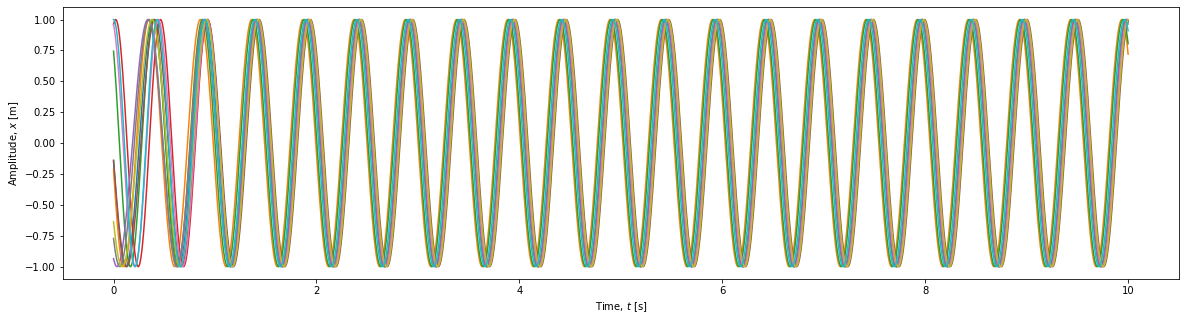

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(tv, np.sin(Phi), "-")
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Amplitude, $x$ [m]")
plt.show()